In [1]:
#LEO EL DATASET
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/aromerq/Documents/Estudio/MTI/Ciencia_Datos/Tallerproyecto/Merma_investigation/clustering/data.csv")
df.head()

,Unnamed: 0,item_nbr,store_nbr,Shlf_Life_Days_Qty,ADJ_RETAIL_AMT,ADJ_UNIT_QTY,sales_retail_amt,sales_unit_qty,WEEK_NUMBER,IS_WEEKDAY,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,norte_chico,norte_grande,zona_central,zona_sur
0,1,386728,149,0.060345,0.997830,1.000000,0.041621,0.007614,0.509804,1.0,...,1,0,0,0,0,0,0,0,1,0
1,14,647086,653,0.767241,0.998328,1.000000,0.012547,0.000000,0.509804,1.0,...,0,0,0,0,0,1,0,0,1,0
2,24,238594,695,0.181034,0.987589,0.996258,0.013706,0.000000,0.509804,0.0,...,0,1,0,0,0,0,0,0,1,0
3,32,398021,51,0.215517,0.999646,1.000000,0.040650,0.047377,0.529412,0.0,...,0,0,1,0,0,0,0,0,1,0
4,39,613568,934,0.250000,0.983367,0.955098,0.013401,0.005076,0.549020,1.0,...,1,0,0,0,0,0,0,0,1,0


In [2]:
df.columns

Index(['Unnamed: 0', 'item_nbr', 'store_nbr', 'Shlf_Life_Days_Qty',
       'ADJ_RETAIL_AMT', 'ADJ_UNIT_QTY', 'sales_retail_amt', 'sales_unit_qty',
       'WEEK_NUMBER', 'IS_WEEKDAY', 'SALES_WASTE_PERCENT', 'WASTE_ABOVE_MEAN',
       'SALE_ABOVE_MEAN', 'YEAR', 'MONTH', 'DAY', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'norte_chico',
       'norte_grande', 'zona_central', 'zona_sur'],
      dtype='object')

In [3]:
df.shape

(591684, 27)

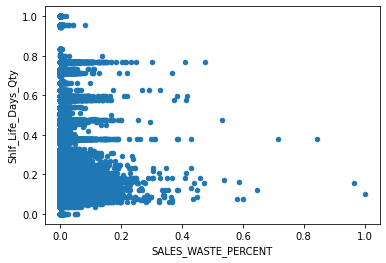

In [4]:
df.plot(x='SALES_WASTE_PERCENT', y='Shlf_Life_Days_Qty', kind='scatter');

In [5]:
#FILTRO PARTE DE LOS DATOS
#df2 = df[0:90000] 

df2 = df.sample(frac=0.25,random_state=60)

In [6]:
df2.shape

(147921, 27)

In [7]:
#FILTRO ZONA SUR
#df2 = df2[df2['zona_sur'].isin([1])]

In [8]:
df2 = df2[['Shlf_Life_Days_Qty',
       'ADJ_UNIT_QTY', 'sales_unit_qty']]

In [9]:
df2.head()

,Shlf_Life_Days_Qty,ADJ_UNIT_QTY,sales_unit_qty
15864,0.172414,0.999065,0.018613
533385,0.215517,1.000000,0.005922
100262,0.181034,0.997194,0.003384
176210,0.215517,0.999065,0.004230
468304,0.715517,1.000000,0.001692


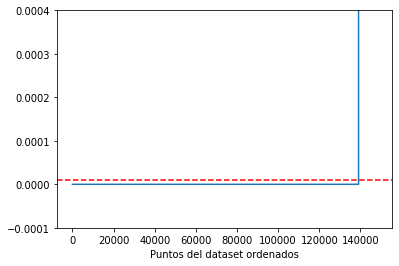

In [10]:
#MÉTODO DE LA RODILLA PARA ESTIMAR EPS 
#calcular la distancia promedio de cada punto a sus k vecinos más cercanos
from sklearn.neighbors import NearestNeighbors
import numpy as np

N = 5
nbrs = NearestNeighbors(n_neighbors=N).fit(df2)
distances, indices = nbrs.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.00001, color='r', linestyle='--')
plt.xlabel('Puntos del dataset ordenados')
plt.ylim(-0.0001, 0.0004)
plt.plot(distances);

In [11]:
#Implementamos DBSCAN
from sklearn.cluster import DBSCAN

eps = 0.02 #Pendiente probar con 40
min_samples = 100
#EPS: Radio 
#MinPts: Numero mínimo puntos en una región
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df2)

In [12]:
import numpy as np
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

In [13]:
df2['Cluster ID'] = db.labels_
df2

,Shlf_Life_Days_Qty,ADJ_UNIT_QTY,sales_unit_qty,Cluster ID
15864,0.172414,0.999065,0.018613,0
533385,0.215517,1.000000,0.005922,0
100262,0.181034,0.997194,0.003384,0
176210,0.215517,0.999065,0.004230,0
468304,0.715517,1.000000,0.001692,1
...,...,...,...,...
290623,0.086207,0.998129,0.005076,0
439906,0.379310,1.000000,0.000000,2
205316,0.181034,1.000000,0.002538,0
495141,0.146552,1.000000,0.000000,0


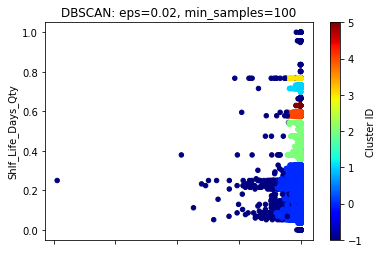

In [22]:
import matplotlib.pyplot as plt

#2D
df2.plot(x='ADJ_UNIT_QTY', y='Shlf_Life_Days_Qty', c='Cluster ID', colormap='jet', kind='scatter')
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
ax.set_xlabel("ADJ_UNIT_QTY")
plt.show()

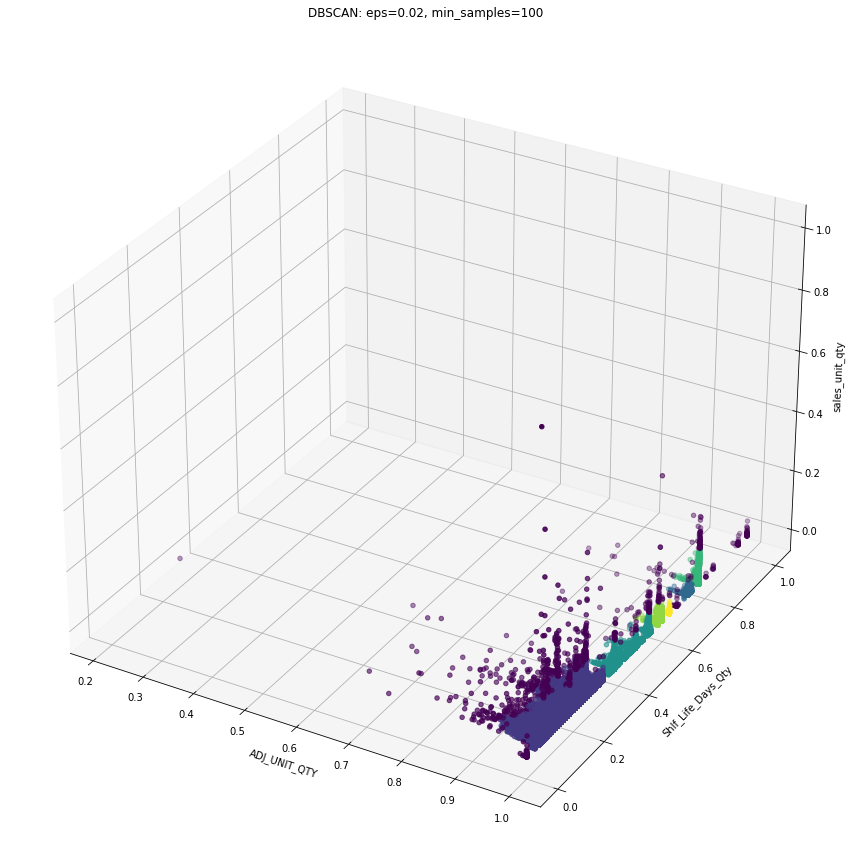

In [19]:
import matplotlib.pyplot as plt

#3D
fig = plt.figure(figsize=(15, 50))
ax = plt.axes(projection ='3d')
ax.scatter(df2['ADJ_UNIT_QTY'], df2['Shlf_Life_Days_Qty'], df2['sales_unit_qty'], c = df2['Cluster ID'])
ax.set_xlabel("ADJ_UNIT_QTY")
ax.set_ylabel("Shlf_Life_Days_Qty")
ax.set_zlabel("sales_unit_qty")
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

In [16]:
#IMPLEMENTAR MEDICIÓN
from sklearn.metrics import silhouette_score as ss

#to_test = [(70,30), (80,30), (90,30), (100,30), (110,30), (120,30), (130,30), (140,30), (150,30)]

#for min_samples, eps in to_test:
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df2)
print(f"Para eps={eps}, min_samples={min_samples}, el coeficiente de Silhouette es {ss(df2, db.labels_)}")
#-1 = mal agrupamiento
#0 = indiferente
#1 = buen agrupamiento

Para eps=0.02, min_samples=100, el coeficiente de Silhouette es 0.9303097760446782
